In [53]:
import eli5
import numpy as np
import pandas as pd
from eli5.sklearn import PermutationImportance
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor

In [54]:
df = pd.read_excel('data_diseases.xlsx')
x = df.iloc[:,0:465]
y = df.iloc[:,465:]

In [55]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv',na_values = '#NAME?')
data = pd.read_csv('Formula_Jamu_Sept_oversampling.csv')

In [56]:
data.head(2)

,C1,C2,C4,C5,C6,C7,C8,C9,C10,C11,...,C3480,C3482,C3483,C3484,C3486,C3487,C3488,C3489,C3490,label
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6


In [126]:
x_new = data.iloc[:,0:2255]
y_new = data.iloc[:,2255:]

In [129]:
data['label'].value_counts()

6    170
4    170
3    170
2    170
1    170
Name: label, dtype: int64

In [57]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [58]:
X = df[['V17', 'V9', 'V6', 'V12']]
Y = df['Class']

In [130]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(x_new, y_new, test_size = 0.30,random_state = 101)

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc1 = accuracy_score(Y_Test,predictionforest)

<ipython-input-131-8b3b76f0d93f>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(random_state= 101).fit(X_Train,Y_Train)


[[42  0  0  0  0]
 [ 4 40  0  0  3]
 [ 2  1 52  4  3]
 [ 4  1  1 38  5]
 [ 4  4  1  2 44]]
              precision    recall  f1-score   support

           1       0.75      1.00      0.86        42
           2       0.87      0.85      0.86        47
           3       0.96      0.84      0.90        62
           4       0.86      0.78      0.82        49
           6       0.80      0.80      0.80        55

    accuracy                           0.85       255
   macro avg       0.85      0.85      0.85       255
weighted avg       0.86      0.85      0.85       255



In [132]:
model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)
predictionforest = model.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc2 = accuracy_score(Y_Test,predictionforest)

[[38  3  1  0  0]
 [ 0 42  1  1  3]
 [ 2  2 50  5  3]
 [ 2  4  3 34  6]
 [ 0  8  1  4 42]]
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        42
           2       0.71      0.89      0.79        47
           3       0.89      0.81      0.85        62
           4       0.77      0.69      0.73        49
           6       0.78      0.76      0.77        55

    accuracy                           0.81       255
   macro avg       0.81      0.81      0.81       255
weighted avg       0.81      0.81      0.81       255



<ipython-input-132-34e1964b5c22>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = RandomForestClassifier(n_estimators=10, random_state= 101).fit(X_Train,Y_Train)


In [133]:
# Random search

import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_Train,Y_Train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    1.8s finished
C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [2],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [4, 6, 8],
                                        'min_samples_split': [5, 7, 10],
                                        'n_estimators': [20]},
                   random_state=101, verbose=1)

<AxesSubplot:xlabel='param_criterion', ylabel='param_n_estimators'>

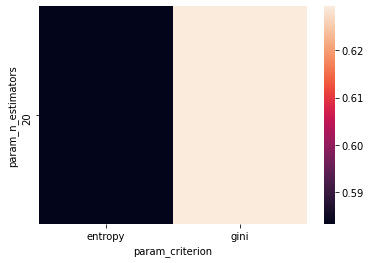

In [134]:
import seaborn as sns

table = pd.pivot_table(pd.DataFrame(model.cv_results_),
    values='mean_test_score', index='param_n_estimators', 
                       columns='param_criterion')
     
sns.heatmap(table)

In [135]:
predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc3 = accuracy_score(Y_Test,predictionforest)

[[42  0  0  0  0]
 [16 26  0  4  1]
 [14  9 28 11  0]
 [15 11  1 22  0]
 [27  8  0 15  5]]
              precision    recall  f1-score   support

           1       0.37      1.00      0.54        42
           2       0.48      0.55      0.51        47
           3       0.97      0.45      0.62        62
           4       0.42      0.45      0.44        49
           6       0.83      0.09      0.16        55

    accuracy                           0.48       255
   macro avg       0.61      0.51      0.45       255
weighted avg       0.65      0.48      0.45       255



In [136]:
# grid search

from sklearn.model_selection import GridSearchCV

grid_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto', 'sqrt'],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [20]}

clf = RandomForestClassifier()
model = GridSearchCV(estimator = clf, param_grid = grid_search, 
                               cv = 4, verbose= 5, n_jobs = -1)
model.fit(X_Train,Y_Train)

predictionforest = model.best_estimator_.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc4 = accuracy_score(Y_Test,predictionforest)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 142 out of 144 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:    0.9s finished
C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


[[42  0  0  0  0]
 [14 27  0  5  1]
 [21  7 24  9  1]
 [14 12  0 23  0]
 [10  6  0 17 22]]
              precision    recall  f1-score   support

           1       0.42      1.00      0.59        42
           2       0.52      0.57      0.55        47
           3       1.00      0.39      0.56        62
           4       0.43      0.47      0.45        49
           6       0.92      0.40      0.56        55

    accuracy                           0.54       255
   macro avg       0.66      0.57      0.54       255
weighted avg       0.69      0.54      0.54       255



In [137]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [138]:
space = {'criterion': hp.choice('criterion', ['entropy', 'gini']),
        'max_depth': hp.quniform('max_depth', 10, 12, 10),
        'max_features': hp.choice('max_features', ['auto', 'sqrt','log2', None]),
        'min_samples_leaf': hp.uniform ('min_samples_leaf', 0, 0.5),
        'min_samples_split' : hp.uniform ('min_samples_split', 0, 1),
        'n_estimators' : hp.choice('n_estimators', [10, 50])
    }

def objective(space):
    model = RandomForestClassifier(criterion = space['criterion'], 
                                   max_depth = space['max_depth'],
                                 max_features = space['max_features'],
                                 min_samples_leaf = space['min_samples_leaf'],
                                 min_samples_split = space['min_samples_split'],
                                 n_estimators = space['n_estimators'], 
                                 )
    
    accuracy = cross_val_score(model, X_Train, Y_Train, cv = 4).mean()

    # We aim to maximize accuracy, therefore we return it as a negative value
    return {'loss': -accuracy, 'status': STATUS_OK }
    
trials = Trials()
best = fmin(fn= objective,
            space= space,
            algo= tpe.suggest,
            max_evals = 20,
            trials= trials)
best

  0%|                                                                           | 0/20 [00:00<?, ?trial/s, best loss=?]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



  5%|██▍                                             | 1/20 [00:00<00:06,  2.96trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 10%|████▊                                           | 2/20 [00:00<00:04,  4.27trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 15%|███████▏                                        | 3/20 [00:00<00:04,  3.72trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 25%|████████████                                    | 5/20 [00:01<00:05,  2.72trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 35%|████████████████▊                               | 7/20 [00:02<00:03,  3.42trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 40%|███████████████████▏                            | 8/20 [00:02<00:03,  3.95trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 45%|█████████████████████▌                          | 9/20 [00:02<00:02,  3.68trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 50%|███████████████████████▌                       | 10/20 [00:03<00:02,  3.51trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 55%|█████████████████████████▊                     | 11/20 [00:03<00:02,  3.40trial/s, best loss: -0.4454017776165427]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 60%|████████████████████████████▊                   | 12/20 [00:03<00:02,  3.25trial/s, best loss: -0.475705151460185]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 65%|███████████████████████████████▏                | 13/20 [00:03<00:01,  3.76trial/s, best loss: -0.475705151460185]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 70%|████████████████████████████████▉              | 14/20 [00:04<00:01,  3.30trial/s, best loss: -0.5093302194812263]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



 75%|███████████████████████████████████▎           | 15/20 [00:04<00:01,  3.18trial/s, best loss: -0.5093302194812263]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 85%|███████████████████████████████████████▉       | 17/20 [00:04<00:00,  4.16trial/s, best loss: -0.5093302194812263]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 90%|██████████████████████████████████████████▎    | 18/20 [00:05<00:00,  4.60trial/s, best loss: -0.5093302194812263]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

 95%|████████████████████████████████████████████▋  | 19/20 [00:05<00:00,  4.99trial/s, best loss: -0.5093302194812263]

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\

100%|███████████████████████████████████████████████| 20/20 [00:05<00:00,  3.56trial/s, best loss: -0.5093302194812263]


C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



{'criterion': 0,
 'max_depth': 10.0,
 'max_features': 3,
 'min_samples_leaf': 0.12345165483009846,
 'min_samples_split': 0.06065293803454541,
 'n_estimators': 0}

In [139]:
crit = {0: 'entropy', 1: 'gini'}
feat = {0: 'auto', 1: 'sqrt', 2: 'log2', 3: None}
est = {0: 10, 1: 50, 2: 75, 3: 100, 4: 125}

trainedforest = RandomForestClassifier(criterion = crit[best['criterion']], 
                                       max_depth = best['max_depth'], 
                                       max_features = feat[best['max_features']], 
                                       min_samples_leaf = best['min_samples_leaf'], 
                                       min_samples_split = best['min_samples_split'], 
                                       n_estimators = est[best['n_estimators']]
                                      ).fit(X_Train,Y_Train)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))
acc5 = accuracy_score(Y_Test,predictionforest)

[[36  0  0  0  6]
 [ 0 27  0  6 14]
 [17 12  0 11 22]
 [ 1 11  0 22 15]
 [ 2 12  0 19 22]]
              precision    recall  f1-score   support

           1       0.64      0.86      0.73        42
           2       0.44      0.57      0.50        47
           3       0.00      0.00      0.00        62
           4       0.38      0.45      0.41        49
           6       0.28      0.40      0.33        55

    accuracy                           0.42       255
   macro avg       0.35      0.46      0.39       255
weighted avg       0.32      0.42      0.36       255



<ipython-input-139-78b270822961>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  trainedforest = RandomForestClassifier(criterion = crit[best['criterion']],
C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [140]:
# Genetic algorithms using TPOT

from tpot import TPOTClassifier

parameters = {'criterion': ['entropy', 'gini'],
               'max_depth': [2],
               'max_features': ['auto'],
               'min_samples_leaf': [4, 12],
               'min_samples_split': [5, 10],
               'n_estimators': [10]}
               
tpot_classifier = TPOTClassifier(generations= 10, population_size= 24, offspring_size= 12,
                                 verbosity= 2, early_stop= 12,
                                 config_dict=
                                 {'sklearn.ensemble.RandomForestClassifier': parameters}, 
                                 cv = 5, scoring = 'accuracy')
tpot_classifier.fit(X_Train,Y_Train)

C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Optimization Progress:   0%|          | 0/144 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.6621848739495798

Generation 2 - Current best internal CV score: 0.6722689075630253

Generation 3 - Current best internal CV score: 0.6722689075630253

Generation 4 - Current best internal CV score: 0.6722689075630253

Generation 5 - Current best internal CV score: 0.6722689075630253

Generation 6 - Current best internal CV score: 0.6789915966386555

Generation 7 - Current best internal CV score: 0.6974789915966386

Generation 8 - Current best internal CV score: 0.6974789915966386

Generation 9 - Current best internal CV score: 0.6974789915966386

Generation 10 - Current best internal CV score: 0.6974789915966386

Best pipeline: RandomForestClassifier(RandomForestClassifier(RandomForestClassifier(CombineDFs(input_matrix, CombineDFs(input_matrix, input_matrix)), criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=12, min_samples_split=5, n_estimators=10), criterion=gini, max_depth=2, max_features=auto, min_samples_leaf=12, m

TPOTClassifier(config_dict={'sklearn.ensemble.RandomForestClassifier': {'criterion': ['entropy',
                                                                                      'gini'],
                                                                        'max_depth': [2],
                                                                        'max_features': ['auto'],
                                                                        'min_samples_leaf': [4,
                                                                                             12],
                                                                        'min_samples_split': [5,
                                                                                              10],
                                                                        'n_estimators': [10]}},
               early_stop=12, generations=10, offspring_size=12,
               population_size=24, scoring='accuracy', verbosity=2)

In [141]:
accuracy = tpot_classifier.score(X_Test, Y_Test)
print(accuracy)

0.6078431372549019


C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [142]:
# Artificial Neural Networks (ANNs) Tuning 
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.wrappers.scikit_learn import KerasClassifier

In [144]:
X_Train.shape[1]

2255

In [155]:
Y_Train.shape

(595, 1)

In [159]:
def DL_Model(activation= 'linear', neurons= 5, optimizer='Adam'):
    model = Sequential()
    model.add(Dense(neurons, input_dim= X_Train.shape[1], activation= activation))
    model.add(Dense(neurons, activation= activation))
    model.add(Dropout(0.3))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer= optimizer, metrics=['accuracy'])
    return model

In [160]:
# Defining grid parameters
activation = ['softmax', 'relu']
neurons = [5, 16, 32, 64]
optimizer = ['Adam', 'Adamax']
param_grid = dict(activation = activation, neurons = neurons, optimizer = optimizer)

clf = KerasClassifier(build_fn= DL_Model, epochs= 500, batch_size=1024, verbose= 2)

In [161]:
model = GridSearchCV(estimator= clf, param_grid=param_grid, n_jobs=-1)
model.fit(X_Train,Y_Train)

Epoch 1/500


ValueError: in user code:

    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:853 train_function  *
        return step_function(self, iterator)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:835 run_step  **
        outputs = model.train_step(data)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\engine\training.py:788 train_step
        loss = self.compiled_loss(
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\engine\compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\keras\backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    C:\Users\Lab PC\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\framework\tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 5) are incompatible


In [115]:
print("Max Accuracy Registred: {} using {}".format(round(model.best_score_,3), model.best_params_))

Max Accuracy Registred: 0.872 using {'activation': 'relu', 'neurons': 5, 'optimizer': 'Adamax'}


In [116]:
prediction_test = model.predict(X_Test)
print(confusion_matrix(Y_Test,prediction_test))
print(classification_report(Y_Test,prediction_test))
accuracy_ANN = accuracy_score(Y_Test,prediction_test)

[[690  33]
 [ 82  38]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92       723
           1       0.54      0.32      0.40       120

    accuracy                           0.86       843
   macro avg       0.71      0.64      0.66       843
weighted avg       0.84      0.86      0.85       843



In [117]:
import sklearn
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection
import sklearn.svm
import optuna

# 1. Define an objective function to be maximized.
def objective(trial):
    iris = sklearn.datasets.load_iris()
    x, y = iris.data, iris.target
    # 2. Suggest values for the hyperparameters using a trial object.
    classifier_name = trial.suggest_categorical('classifier', ['SVC', 'RandomForest'])
    if classifier_name == 'SVC':
         svc_c = trial.suggest_loguniform('svc_c', 1e-10, 1e10)
         classifier_obj = sklearn.svm.SVC(C=svc_c, gamma='auto')
    else:
        rf_max_depth = int(trial.suggest_loguniform('rf_max_depth', 2, 32))
        classifier_obj = sklearn.ensemble.RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)
    ...
    return accuracy


# 3. Create a study object and optimize the objective function.
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

[I 2021-09-07 08:25:19,049] A new study created in memory with name: no-name-310a6e2c-5705-4a66-a698-1b870ffcfdf3
[I 2021-09-07 08:25:19,054] Trial 0 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.7017942621898823}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,057] Trial 1 finished with value: 0.8576512455516014 and parameters: {'classifier': 'SVC', 'svc_c': 1.2353045775287733e-07}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,061] Trial 2 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 9.673245543826328}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,066] Trial 3 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 4.02553430363366}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,069] Trial 4 finished with value: 0.8576512455

[I 2021-09-07 08:25:19,255] Trial 38 finished with value: 0.8576512455516014 and parameters: {'classifier': 'SVC', 'svc_c': 413421026.9848357}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,260] Trial 39 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 7.405265898953495}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,266] Trial 40 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 15.147659382086873}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,272] Trial 41 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 4.183249737852378}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,278] Trial 42 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 20.322770702636106}. Best is trial 0 with v

[I 2021-09-07 08:25:19,479] Trial 76 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.298155277013712}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,484] Trial 77 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.6849895705975655}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,491] Trial 78 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 4.980266852119248}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,498] Trial 79 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 2.59994736563862}. Best is trial 0 with value: 0.8576512455516014.
[I 2021-09-07 08:25:19,504] Trial 80 finished with value: 0.8576512455516014 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 27.06023595541423}. Best is 